In [ ]:
pip install wordcloud

In [ ]:
pip install nltk

In [ ]:
pip install vaderSentiment

### Web Scraping to Get Customer Reviews 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
import requests
from bs4 import BeautifulSoup
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
import pandas as pd
df = pd.DataFrame()
df["reviews"] = reviews
df.head(20)

,reviews
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...
5,✅ Trip Verified | On a recent flight from Cy...
6,✅ Trip Verified | Flight BA 0560 arrived in ...
7,✅ Trip Verified | This was the first time I ...
8,✅ Trip Verified | Pretty good flight but sti...
9,"✅ Trip Verified | Check in was fine, but no pr..."


In [9]:
df.to_csv("BA_data.csv") 

df.reviews= df.reviews.str.split('|',expand=True)[0]
df.head()

,reviews
0,British airways lost bags in LHR then found...
1,The check in process and reward/loyalty progr...
2,"We flew in November 2023, but it took this ..."
3,I left for London from Johannesburg at 21:15 ...
4,After an excellent flight on a 777 CPT to L...


In [18]:
import nltk
nltk.download('punkt_tab')
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}

def token_stop_pos(text):
    tokens_with_tags = pos_tag(word_tokenize(text))
    return [
        (word, pos_dict.get(tag[0])) 
        for word, tag in tokens_with_tags 
        if word.lower() not in stopwords.words('english')
    ]

df['POS tagged'] = df['reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91931\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\91931\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91931\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91931\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91931\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91931\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downlo

,reviews,POS tagged
0,British airways lost bags in LHR then found...,"[(British, a), (airways, n), (lost, v), (bags,..."
1,The check in process and reward/loyalty progr...,"[(check, n), (process, n), (reward/loyalty, n)..."
2,"We flew in November 2023, but it took this ...","[(flew, v), (November, n), (2023, None), (,, N..."
3,I left for London from Johannesburg at 21:15 ...,"[(left, v), (London, n), (Johannesburg, n), (2..."
4,After an excellent flight on a 777 CPT to L...,"[(excellent, a), (flight, n), (777, None), (CP..."


In [19]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,POS tagged,Lemma
0,British airways lost bags in LHR then found...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find . Sent Colo...
1,The check in process and reward/loyalty progr...,"[(check, n), (process, n), (reward/loyalty, n)...",check process reward/loyalty program mess . ...
2,"We flew in November 2023, but it took this ...","[(flew, v), (November, n), (2023, None), (,, N...","fly November 2023 , take long seek satisfact..."
3,I left for London from Johannesburg at 21:15 ...,"[(left, v), (London, n), (Johannesburg, n), (2...",leave London Johannesburg 21:15 22 December ...
4,After an excellent flight on a 777 CPT to L...,"[(excellent, a), (flight, n), (777, None), (CP...",excellent flight 777 CPT LHR return good . B...


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def analyze_sentiment(review):
    compound_score = analyzer.polarity_scores(review)['compound']
    if compound_score >= 0.5:
        sentiment = 'Positive'
    elif compound_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return compound_score, sentiment

##df['Analysis'] = df['Sentiment'].apply(analyze_sentiment)

df[['Sentiment', 'Analysis']] = df['Lemma'].apply(
    lambda review: pd.Series(analyze_sentiment(review))
)
df.head()

,reviews,POS tagged,Lemma,Sentiment,Analysis
0,British airways lost bags in LHR then found...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find . Sent Colo...,-0.5994,Negative
1,The check in process and reward/loyalty progr...,"[(check, n), (process, n), (reward/loyalty, n)...",check process reward/loyalty program mess . ...,-0.7351,Negative
2,"We flew in November 2023, but it took this ...","[(flew, v), (November, n), (2023, None), (,, N...","fly November 2023 , take long seek satisfact...",-0.0237,Negative
3,I left for London from Johannesburg at 21:15 ...,"[(left, v), (London, n), (Johannesburg, n), (2...",leave London Johannesburg 21:15 22 December ...,-0.9535,Negative
4,After an excellent flight on a 777 CPT to L...,"[(excellent, a), (flight, n), (777, None), (CP...",excellent flight 777 CPT LHR return good . B...,0.9886,Positive


In [33]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    453
Negative    439
Neutral     108
Name: count, dtype: int64

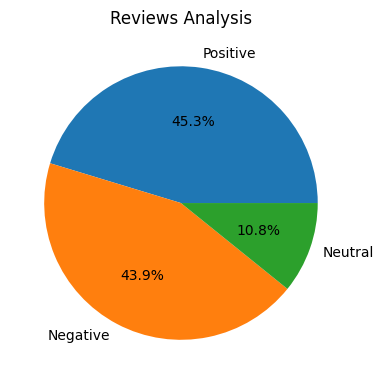

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, autopct='%1.1f%%')
plt.show()

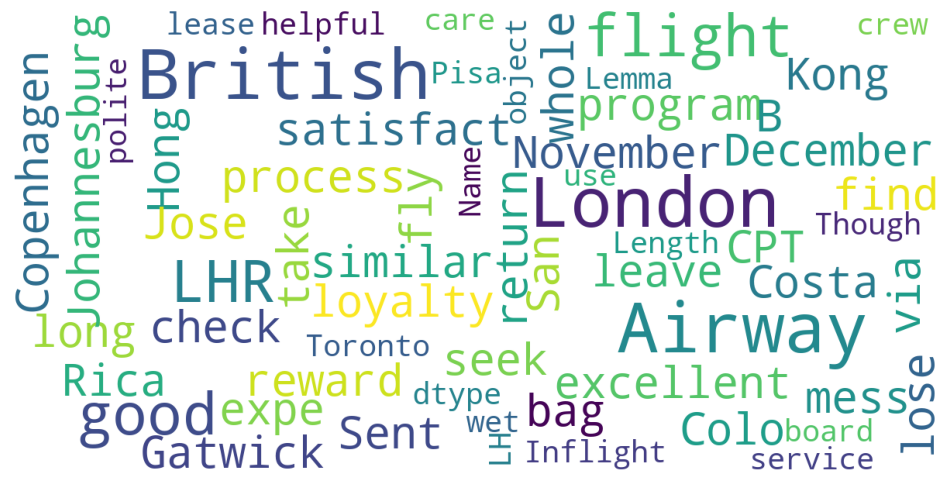

In [40]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)